In [1]:
import pandas as pd

In [2]:
laps = pd.read_csv('laps.csv')
laps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number
0,1141,7768,1,219.0,217.0,141.0,2023-03-04T15:12:21.455000+00:00,NaN,True,NaN,53.666,38.509,"[None, 2064, 2064, 2048, 2048, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049, 2048, 0]",2
1,1141,7768,1,240.0,270.0,322.0,2023-03-04T15:14:33.390000+00:00,91.295,False,29.152,39.195,22.948,"[2049, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2051, 2049, 2049, 2049, 2049, 2051, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2064]",3
2,1141,7768,1,205.0,215.0,234.0,2023-03-04T15:16:04.919000+00:00,109.812,False,35.615,44.953,29.244,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 0]",4
3,1141,7768,1,170.0,155.0,142.0,2023-03-04T15:22:49.521000+00:00,432.160,True,333.663,53.390,45.107,"[2064, 2064, 2064, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[0, 0, 0, 0, 0, 0, 0]",5
4,1141,7768,1,195.0,185.0,135.0,2023-03-04T15:25:06.706000+00:00,132.516,False,48.978,48.136,35.402,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2049, 2049, 2049, 2049, 2051, 2049]",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,1252,9662,81,NaN,293.0,304.0,2024-12-08T14:24:12.742000+00:00,87.731,False,17.591,38.078,32.062,"[None, 2048, 2048, 2048, 2049]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2049, 2049, 2049, 2048, 2048, 2048, 204...",52
70405,1252,9662,81,290.0,295.0,307.0,2024-12-08T14:25:40.531000+00:00,87.781,False,17.639,38.014,32.128,"[2049, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2049, 204...","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...",53
70406,1252,9662,81,293.0,296.0,309.0,2024-12-08T14:27:08.205000+00:00,87.816,False,17.603,38.000,32.213,"[2048, 2048, 2048, 2049, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2049, 2048, 2048, 2048, 2048, 2048, 204...",54
70407,1252,9662,81,295.0,306.0,310.0,2024-12-08T14:28:36.037000+00:00,88.554,False,17.650,38.546,32.358,"[None, 2048, 2048, 2048, 2048]","[2049, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2049, 2048, 2048, 2048, 204...",55


In [3]:
laps.isna().sum()

meeting_key             0
session_key             0
driver_number           0
i1_speed             8471
i2_speed              343
st_speed             5159
date_start              0
lap_duration          797
is_pit_out_lap          0
duration_sector_1     184
duration_sector_2     301
duration_sector_3     835
segments_sector_1       0
segments_sector_2       0
segments_sector_3       0
lap_number              0
dtype: int64

In [4]:
laps.nunique()

meeting_key             46
session_key            115
driver_number           27
i1_speed               310
i2_speed               297
st_speed               332
date_start           70339
lap_duration         40175
is_pit_out_lap           2
duration_sector_1    26688
duration_sector_2    25943
duration_sector_3    24678
segments_sector_1     4165
segments_sector_2     5252
segments_sector_3     3686
lap_number              77
dtype: int64

In [5]:
laps.dtypes

meeting_key            int64
session_key            int64
driver_number          int64
i1_speed             float64
i2_speed             float64
st_speed             float64
date_start            object
lap_duration         float64
is_pit_out_lap          bool
duration_sector_1    float64
duration_sector_2    float64
duration_sector_3    float64
segments_sector_1     object
segments_sector_2     object
segments_sector_3     object
lap_number             int64
dtype: object

In [6]:
laps['date_start'] = laps['date_start'].str[:19]

In [7]:
laps['date_start'] = pd.to_datetime(laps['date_start'], format='%Y-%m-%dT%H:%M:%S')

In [8]:
laps = laps.drop(columns=['segments_sector_1', 'segments_sector_2', 'segments_sector_3'])

In [9]:
laps[(laps.session_key == 7768) & (laps.driver_number == 1)]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number
0,1141,7768,1,219.0,217.0,141.0,2023-03-04 15:12:21,NaN,True,NaN,53.666,38.509,2
1,1141,7768,1,240.0,270.0,322.0,2023-03-04 15:14:33,91.295,False,29.152,39.195,22.948,3
2,1141,7768,1,205.0,215.0,234.0,2023-03-04 15:16:04,109.812,False,35.615,44.953,29.244,4
3,1141,7768,1,170.0,155.0,142.0,2023-03-04 15:22:49,432.160,True,333.663,53.390,45.107,5
4,1141,7768,1,195.0,185.0,135.0,2023-03-04 15:25:06,132.516,False,48.978,48.136,35.402,6
5,1141,7768,1,182.0,172.0,171.0,2023-03-04 15:36:40,686.562,True,599.070,56.693,30.799,7
6,1141,7768,1,240.0,270.0,323.0,2023-03-04 15:38:45,90.503,False,28.925,38.915,22.663,8
7,1141,7768,1,158.0,184.0,204.0,2023-03-04 15:40:16,125.756,False,38.904,53.517,33.335,9
8,1141,7768,1,188.0,196.0,168.0,2023-03-04 15:57:27,1020.315,True,939.877,52.962,27.476,10
9,1141,7768,1,242.0,269.0,321.0,2023-03-04 15:59:22,89.897,False,28.722,38.645,22.530,11


In [10]:
laps = laps.sort_values(by=['meeting_key', 'session_key', 'driver_number', 'lap_number', 'date_start'])

In [11]:
laps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number
0,1141,7768,1,219.0,217.0,141.0,2023-03-04 15:12:21,NaN,True,NaN,53.666,38.509,2
1,1141,7768,1,240.0,270.0,322.0,2023-03-04 15:14:33,91.295,False,29.152,39.195,22.948,3
2,1141,7768,1,205.0,215.0,234.0,2023-03-04 15:16:04,109.812,False,35.615,44.953,29.244,4
3,1141,7768,1,170.0,155.0,142.0,2023-03-04 15:22:49,432.160,True,333.663,53.390,45.107,5
4,1141,7768,1,195.0,185.0,135.0,2023-03-04 15:25:06,132.516,False,48.978,48.136,35.402,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,1252,9662,81,NaN,293.0,304.0,2024-12-08 14:24:12,87.731,False,17.591,38.078,32.062,52
70405,1252,9662,81,290.0,295.0,307.0,2024-12-08 14:25:40,87.781,False,17.639,38.014,32.128,53
70406,1252,9662,81,293.0,296.0,309.0,2024-12-08 14:27:08,87.816,False,17.603,38.000,32.213,54
70407,1252,9662,81,295.0,306.0,310.0,2024-12-08 14:28:36,88.554,False,17.650,38.546,32.358,55


In [12]:
laps[laps['is_pit_out_lap'] == True]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number
0,1141,7768,1,219.0,217.0,141.0,2023-03-04 15:12:21,NaN,True,NaN,53.666,38.509,2
3,1141,7768,1,170.0,155.0,142.0,2023-03-04 15:22:49,432.160,True,333.663,53.390,45.107,5
5,1141,7768,1,182.0,172.0,171.0,2023-03-04 15:36:40,686.562,True,599.070,56.693,30.799,7
8,1141,7768,1,188.0,196.0,168.0,2023-03-04 15:57:27,1020.315,True,939.877,52.962,27.476,10
11,1141,7768,1,184.0,202.0,158.0,2023-03-04 16:05:28,270.045,True,189.046,53.775,27.224,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70235,1252,9662,61,285.0,292.0,304.0,2024-12-08 13:37:43,110.994,True,38.940,38.672,33.382,21
70294,1252,9662,63,293.0,318.0,291.0,2024-12-08 13:43:13,108.853,True,37.901,38.179,32.773,26
70331,1252,9662,77,275.0,284.0,294.0,2024-12-08 13:13:25,130.132,True,58.034,39.150,32.948,7
70357,1252,9662,81,285.0,286.0,296.0,2024-12-08 13:10:28,110.887,True,40.033,38.421,32.433,5


In [13]:
sessions = pd.read_csv('sessions.csv')
sessions

,location,country_key,country_code,country_name,circuit_key,circuit_short_name,session_type,session_name,date_start,date_end,gmt_offset,session_key,meeting_key,year
0,Sakhir,36,BRN,Bahrain,63,Sakhir,Qualifying,Qualifying,2023-03-04T15:00:00+00:00,2023-03-04T16:00:00+00:00,03:00:00,7768,1141,2023
1,Sakhir,36,BRN,Bahrain,63,Sakhir,Race,Race,2023-03-05T15:00:00+00:00,2023-03-05T17:00:00+00:00,03:00:00,7953,1141,2023
2,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,Qualifying,Qualifying,2023-03-18T17:00:00+00:00,2023-03-18T18:00:00+00:00,03:00:00,7775,1142,2023
3,Jeddah,153,KSA,Saudi Arabia,149,Jeddah,Race,Race,2023-03-19T17:00:00+00:00,2023-03-19T19:00:00+00:00,03:00:00,7779,1142,2023
4,Melbourne,5,AUS,Australia,10,Melbourne,Qualifying,Qualifying,2023-04-01T05:00:00+00:00,2023-04-01T06:00:00+00:00,11:00:00,7783,1143,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Lusail,149,QAT,Qatar,150,Lusail,Race,Sprint,2024-11-30T14:00:00+00:00,2024-11-30T15:00:00+00:00,03:00:00,9654,1251,2024
112,Lusail,149,QAT,Qatar,150,Lusail,Qualifying,Qualifying,2024-11-30T18:00:00+00:00,2024-11-30T19:00:00+00:00,03:00:00,9646,1251,2024
113,Lusail,149,QAT,Qatar,150,Lusail,Race,Race,2024-12-01T16:00:00+00:00,2024-12-01T18:00:00+00:00,03:00:00,9655,1251,2024
114,Yas Island,21,UAE,United Arab Emirates,70,Yas Marina Circuit,Qualifying,Qualifying,2024-12-07T14:00:00+00:00,2024-12-07T15:00:00+00:00,04:00:00,9658,1252,2024


In [14]:
sessions[['session_key', 'session_type', 'session_name', 'location']]

,session_key,session_type,session_name,location
0,7768,Qualifying,Qualifying,Sakhir
1,7953,Race,Race,Sakhir
2,7775,Qualifying,Qualifying,Jeddah
3,7779,Race,Race,Jeddah
4,7783,Qualifying,Qualifying,Melbourne
...,...,...,...,...
111,9654,Race,Sprint,Lusail
112,9646,Qualifying,Qualifying,Lusail
113,9655,Race,Race,Lusail
114,9658,Qualifying,Qualifying,Yas Island


In [15]:
# merge laps with sessions to get session key
laps = pd.merge(laps, sessions[['session_key', 'session_type', 'session_name', 'location']], on='session_key', how='left')
laps

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
0,1141,7768,1,219.0,217.0,141.0,2023-03-04 15:12:21,NaN,True,NaN,53.666,38.509,2,Qualifying,Qualifying,Sakhir
1,1141,7768,1,240.0,270.0,322.0,2023-03-04 15:14:33,91.295,False,29.152,39.195,22.948,3,Qualifying,Qualifying,Sakhir
2,1141,7768,1,205.0,215.0,234.0,2023-03-04 15:16:04,109.812,False,35.615,44.953,29.244,4,Qualifying,Qualifying,Sakhir
3,1141,7768,1,170.0,155.0,142.0,2023-03-04 15:22:49,432.160,True,333.663,53.390,45.107,5,Qualifying,Qualifying,Sakhir
4,1141,7768,1,195.0,185.0,135.0,2023-03-04 15:25:06,132.516,False,48.978,48.136,35.402,6,Qualifying,Qualifying,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70404,1252,9662,81,NaN,293.0,304.0,2024-12-08 14:24:12,87.731,False,17.591,38.078,32.062,52,Race,Race,Yas Island
70405,1252,9662,81,290.0,295.0,307.0,2024-12-08 14:25:40,87.781,False,17.639,38.014,32.128,53,Race,Race,Yas Island
70406,1252,9662,81,293.0,296.0,309.0,2024-12-08 14:27:08,87.816,False,17.603,38.000,32.213,54,Race,Race,Yas Island
70407,1252,9662,81,295.0,306.0,310.0,2024-12-08 14:28:36,88.554,False,17.650,38.546,32.358,55,Race,Race,Yas Island


In [16]:
tyres = pd.read_csv('tyres.csv')
tyres

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1141,7768,1,1.0,1,1,SOFT,0.0
1,1141,7768,1,4.0,1,1,SOFT,0.0
2,1141,7768,1,11.0,1,1,SOFT,0.0
3,1141,7768,1,81.0,1,1,SOFT,0.0
4,1141,7768,1,27.0,1,2,SOFT,0.0
...,...,...,...,...,...,...,...,...
7030,1247,9617,2,30.0,37,57,MEDIUM,0.0
7031,1247,9617,3,20.0,39,57,MEDIUM,0.0
7032,1247,9617,2,43.0,40,57,MEDIUM,0.0
7033,1247,9617,2,63.0,41,57,MEDIUM,0.0


In [17]:
tyres.isna().sum()

meeting_key          0
session_key          0
stint_number         0
driver_number        1
lap_start            0
lap_end              0
compound             6
tyre_age_at_start    2
dtype: int64

In [18]:
tyres = tyres.dropna(subset=['tyre_age_at_start', 'driver_number', 'compound'], how='any').copy()

In [19]:
tyres.driver_number = tyres.driver_number.astype(int)

In [20]:
races = laps[laps.session_type=='Race'].session_key.unique().tolist()
pilots = laps.driver_number.unique().tolist()

In [21]:
i=0
k=0
for race in races:
    k+=1
    for pilot in pilots:
        lap_list = laps[(laps.session_key == pilot) & (laps.driver_number == pilot)].index.tolist()
        first_tyre = tyres[(tyres.session_key == race) & (tyres.driver_number == pilot)]['compound'].shape[0]
        if first_tyre == 0:
            i+=1
print("Missing tyre type:" ,i)
print("All races:",k)

Missing tyre type: 552
All races: 58


Tyre type very is very important for lap duration, but we don't know 417 tires information worn by the driver during the race. Unfortunalty we don't use tyre info. API must be improvment.

SOFT = Best,
MEDIUM = 0.7 second slow (avg),
HARD = 1.4 second slow (avg)

The must important tyres are WET and INTER (for rainy)

In [22]:
laps[(laps.session_type == 'Qualifying') & (laps.is_pit_out_lap == True)]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
0,1141,7768,1,219.0,217.0,141.0,2023-03-04 15:12:21,NaN,True,NaN,53.666,38.509,2,Qualifying,Qualifying,Sakhir
3,1141,7768,1,170.0,155.0,142.0,2023-03-04 15:22:49,432.160,True,333.663,53.390,45.107,5,Qualifying,Qualifying,Sakhir
5,1141,7768,1,182.0,172.0,171.0,2023-03-04 15:36:40,686.562,True,599.070,56.693,30.799,7,Qualifying,Qualifying,Sakhir
8,1141,7768,1,188.0,196.0,168.0,2023-03-04 15:57:27,1020.315,True,939.877,52.962,27.476,10,Qualifying,Qualifying,Sakhir
11,1141,7768,1,184.0,202.0,158.0,2023-03-04 16:05:28,270.045,True,189.046,53.775,27.224,13,Qualifying,Qualifying,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69410,1252,9658,81,249.0,297.0,314.0,2024-12-07 14:14:24,355.482,True,270.623,41.070,43.789,4,Qualifying,Qualifying,Yas Island
69412,1252,9658,81,195.0,294.0,311.0,2024-12-07 14:31:56,912.182,True,827.166,43.810,41.206,6,Qualifying,Qualifying,Yas Island
69415,1252,9658,81,191.0,299.0,127.0,2024-12-07 14:40:12,333.675,True,249.532,46.495,37.648,9,Qualifying,Qualifying,Yas Island
69417,1252,9658,81,258.0,299.0,311.0,2024-12-07 14:52:04,572.262,True,490.731,40.777,40.754,11,Qualifying,Qualifying,Yas Island


In [23]:
laps = laps[~((laps.session_type == 'Qualifying') & (laps.is_pit_out_lap == True))]

In [24]:
laps[(laps.session_type == 'Qualifying') & (laps.lap_duration.isna())]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
65,1141,7768,16,NaN,NaN,NaN,2023-03-04 15:04:35,NaN,False,NaN,NaN,NaN,3,Qualifying,Qualifying,Sakhir
96,1141,7768,18,177.0,137.0,255.0,2023-03-04 16:08:19,NaN,False,35.586,55.846,NaN,18,Qualifying,Qualifying,Sakhir
103,1141,7768,21,216.0,NaN,297.0,2023-03-04 15:03:40,NaN,False,32.668,NaN,NaN,3,Qualifying,Qualifying,Sakhir
111,1141,7768,22,215.0,NaN,299.0,2023-03-04 15:03:35,NaN,False,32.907,NaN,NaN,3,Qualifying,Qualifying,Sakhir
142,1141,7768,27,240.0,270.0,317.0,2023-03-04 15:03:21,NaN,False,29.705,39.692,NaN,2,Qualifying,Qualifying,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68033,1251,9650,55,189.0,194.0,172.0,2024-11-29 18:14:47,NaN,False,42.281,33.583,NaN,19,Qualifying,Sprint Qualifying,Lusail
69196,1252,9658,1,171.0,195.0,207.0,2024-12-07 15:03:47,NaN,False,22.382,45.831,NaN,15,Qualifying,Qualifying,Yas Island
69228,1252,9658,10,242.0,217.0,225.0,2024-12-07 15:02:40,NaN,False,22.725,45.280,NaN,18,Qualifying,Qualifying,Yas Island
69393,1252,9658,63,180.0,219.0,219.0,2024-12-07 15:03:37,NaN,False,28.169,48.508,NaN,19,Qualifying,Qualifying,Yas Island


In [25]:
laps = laps[~((laps.session_type == 'Qualifying') & (laps.lap_duration.isna()))]

In [26]:
laps.isna().sum()   

meeting_key             0
session_key             0
driver_number           0
i1_speed             8372
i2_speed              148
st_speed             4429
date_start              0
lap_duration           83
is_pit_out_lap          0
duration_sector_1      61
duration_sector_2     111
duration_sector_3     128
lap_number              0
session_type            0
session_name            0
location                0
dtype: int64

In [27]:
laps[laps.duration_sector_1.isna()]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
2608,1143,7783,16,NaN,NaN,319.0,2023-04-01 05:05:50,451.259,False,NaN,NaN,NaN,2,Qualifying,Qualifying,Melbourne
2632,1143,7783,18,NaN,NaN,292.0,2023-04-01 05:05:58,432.918,False,NaN,NaN,NaN,2,Qualifying,Qualifying,Melbourne
2779,1143,7783,31,NaN,NaN,307.0,2023-04-01 05:06:08,551.110,False,NaN,NaN,NaN,2,Qualifying,Qualifying,Melbourne
2796,1143,7783,44,NaN,NaN,301.0,2023-04-01 05:06:05,527.135,False,NaN,NaN,NaN,2,Qualifying,Qualifying,Melbourne
2823,1143,7783,55,NaN,NaN,319.0,2023-04-01 05:05:55,441.400,False,NaN,NaN,NaN,2,Qualifying,Qualifying,Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44555,1236,9519,3,NaN,NaN,246.0,2024-05-25 14:29:26,108.013,False,NaN,NaN,27.130,16,Qualifying,Qualifying,Monaco
55579,1242,9574,63,324.0,NaN,313.0,2024-07-28 14:22:03,NaN,False,NaN,NaN,NaN,44,Race,Race,Spa-Francorchamps
56871,1243,9582,31,NaN,NaN,NaN,2024-08-25 13:42:19,75.609,True,NaN,NaN,22.632,31,Race,Race,Zandvoort
63389,1248,9625,10,NaN,159.0,300.0,2024-10-27 20:14:27,115.050,False,NaN,NaN,34.459,6,Race,Race,Mexico City


In [28]:
laps = laps.dropna(subset=['duration_sector_1'])

In [29]:
laps.isna().sum()

meeting_key             0
session_key             0
driver_number           0
i1_speed             8329
i2_speed              112
st_speed             4400
date_start              0
lap_duration           56
is_pit_out_lap          0
duration_sector_1       0
duration_sector_2      55
duration_sector_3      77
lap_number              0
session_type            0
session_name            0
location                0
dtype: int64

In [30]:
# Race laps with missing sector 2 duration are DNF(Did Not Finish) laps 
# Qualifying laps with missing sector 2 duration are pit in laps
laps[laps.duration_sector_2.isna()]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
1936,1142,7779,18,284.0,NaN,NaN,2023-03-19 17:29:48,NaN,False,35.728,NaN,NaN,17,Race,Race,Jeddah
2537,1143,7783,4,235.0,NaN,318.0,2023-04-01 05:05:38,515.820,False,31.931,NaN,NaN,4,Qualifying,Qualifying,Melbourne
2583,1143,7783,14,254.0,NaN,295.0,2023-04-01 05:05:44,445.141,False,30.723,NaN,NaN,2,Qualifying,Qualifying,Melbourne
2659,1143,7783,20,282.0,NaN,320.0,2023-04-01 05:05:34,734.838,False,27.511,NaN,NaN,4,Qualifying,Qualifying,Melbourne
2891,1143,7783,81,237.0,NaN,284.0,2023-04-01 05:05:22,546.193,False,37.204,NaN,NaN,4,Qualifying,Qualifying,Melbourne
3466,1143,7787,23,276.0,NaN,301.0,2023-04-02 05:13:36,NaN,False,28.815,NaN,NaN,7,Race,Race,Melbourne
4964,1207,9070,21,188.0,NaN,NaN,2023-04-30 11:20:39,NaN,False,39.360,NaN,NaN,10,Race,Race,Baku
7063,1210,9090,1,213.0,NaN,NaN,2023-05-27 14:06:16,664.896,False,19.146,NaN,NaN,4,Qualifying,Qualifying,Monaco
7093,1210,9090,2,127.0,NaN,NaN,2023-05-27 14:06:07,659.979,False,29.330,NaN,NaN,5,Qualifying,Qualifying,Monaco
7127,1210,9090,10,157.0,NaN,NaN,2023-05-27 14:06:17,750.715,False,27.681,NaN,NaN,5,Qualifying,Qualifying,Monaco


In [31]:
# Race laps with missing sector 3 duration are DNF(Did Not Finish) laps 
laps[(laps.duration_sector_3.isna()) & (laps.duration_sector_2.notna())]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
605,1141,7953,16,230.0,188.0,305.0,2023-03-05 16:08:25,NaN,False,31.015,42.880,NaN,40,Race,Race,Sakhir
8117,1210,9094,20,NaN,127.0,203.0,2023-05-28 14:45:41,NaN,False,25.289,53.453,NaN,71,Race,Race,Monaco
12123,1212,9110,63,259.0,233.0,254.0,2023-06-18 19:16:13,NaN,False,21.714,25.089,NaN,54,Race,Race,Montréal
23422,1219,9165,77,285.0,256.0,279.0,2023-09-17 13:33:26,NaN,False,28.796,41.840,NaN,52,Race,Race,Marina Bay
28590,1223,9181,2,286.0,255.0,328.0,2023-10-29 22:05:40,NaN,False,29.159,33.427,NaN,71,Race,Race,Mexico City
32210,1225,9189,22,125.0,113.0,154.0,2023-11-19 07:27:44,NaN,False,31.856,44.463,NaN,47,Race,Race,Las Vegas
32353,1225,9189,27,NaN,209.0,285.0,2023-11-19 07:25:49,NaN,False,28.363,33.972,NaN,46,Race,Race,Las Vegas
36357,1230,9480,18,284.0,296.0,NaN,2024-03-09 17:12:05,NaN,False,35.683,30.131,NaN,6,Race,Race,Jeddah
37192,1231,9488,1,270.0,308.0,302.0,2024-03-24 04:07:27,NaN,False,28.756,18.353,NaN,4,Race,Race,Melbourne
37942,1231,9488,44,275.0,79.0,298.0,2024-03-24 04:24:31,NaN,False,28.945,32.054,NaN,16,Race,Race,Melbourne


In [32]:
laps = laps.dropna(subset=['duration_sector_2', 'duration_sector_3'])

In [33]:
laps.isna().sum()

meeting_key             0
session_key             0
driver_number           0
i1_speed             8323
i2_speed               57
st_speed             4360
date_start              0
lap_duration            0
is_pit_out_lap          0
duration_sector_1       0
duration_sector_2       0
duration_sector_3       0
lap_number              0
session_type            0
session_name            0
location                0
dtype: int64

In [34]:
laps[laps['i1_speed'].isna()]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
235,1141,7953,1,NaN,238.0,287.0,2023-03-05 15:06:55,98.006,False,31.388,42.469,24.149,3,Race,Race,Sakhir
237,1141,7953,1,NaN,239.0,290.0,2023-03-05 15:10:11,98.035,False,31.244,42.724,24.067,5,Race,Race,Sakhir
240,1141,7953,1,NaN,240.0,NaN,2023-03-05 15:15:05,98.154,False,31.291,42.833,24.030,8,Race,Race,Sakhir
243,1141,7953,1,NaN,239.0,292.0,2023-03-05 15:20:00,98.483,False,31.342,42.978,24.163,11,Race,Race,Sakhir
250,1141,7953,1,NaN,239.0,286.0,2023-03-05 15:31:51,97.614,False,31.211,42.569,23.834,18,Race,Race,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70377,1252,9662,81,NaN,301.0,309.0,2024-12-08 13:43:42,89.631,False,17.929,38.447,33.255,25,Race,Race,Yas Island
70382,1252,9662,81,NaN,300.0,309.0,2024-12-08 13:51:12,91.627,False,18.099,38.563,34.965,30,Race,Race,Yas Island
70393,1252,9662,81,NaN,297.0,309.0,2024-12-08 14:07:58,88.052,False,17.630,37.968,32.454,41,Race,Race,Yas Island
70404,1252,9662,81,NaN,293.0,304.0,2024-12-08 14:24:12,87.731,False,17.591,38.078,32.062,52,Race,Race,Yas Island


In [35]:
laps[laps['st_speed'].isna()]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
240,1141,7953,1,NaN,240.0,NaN,2023-03-05 15:15:05,98.154,False,31.291,42.833,24.030,8,Race,Race,Sakhir
241,1141,7953,1,229.0,242.0,NaN,2023-03-05 15:16:44,98.278,False,31.336,42.823,24.119,9,Race,Race,Sakhir
242,1141,7953,1,230.0,242.0,NaN,2023-03-05 15:18:22,98.369,False,31.361,42.884,24.124,10,Race,Race,Sakhir
246,1141,7953,1,229.0,241.0,NaN,2023-03-05 15:24:56,101.295,False,31.427,42.876,26.992,14,Race,Race,Sakhir
260,1141,7953,1,231.0,241.0,NaN,2023-03-05 15:48:07,97.651,False,31.112,42.554,23.985,28,Race,Race,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69497,1252,9662,4,287.0,NaN,NaN,2024-12-08 13:32:23,89.133,False,17.954,38.469,32.710,20,Race,Race,Yas Island
70097,1252,9662,43,NaN,NaN,NaN,2024-12-08 13:32:33,90.066,False,18.247,38.513,33.306,19,Race,Race,Yas Island
70122,1252,9662,44,NaN,297.0,NaN,2024-12-08 13:32:51,89.719,False,18.038,38.648,33.033,20,Race,Race,Yas Island
70178,1252,9662,55,287.0,NaN,NaN,2024-12-08 13:32:28,89.191,False,17.989,38.399,32.803,20,Race,Race,Yas Island


In [36]:
laps[laps['i2_speed'].isna()]

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
3708,1143,7787,55,269.0,NaN,314.0,2023-04-02 05:45:19,83.225,False,29.315,18.066,35.844,16,Race,Race,Melbourne
10891,1212,9106,55,234.0,NaN,NaN,2023-06-17 20:59:03,89.294,False,24.966,28.172,36.156,23,Qualifying,Qualifying,Montréal
13670,1213,9118,20,299.0,NaN,297.0,2023-07-02 13:44:54,77.880,False,17.921,-39.781,99.740,34,Race,Race,Spielberg
21241,1218,9157,1,298.0,NaN,293.0,2023-09-03 14:35:36,87.525,False,28.415,30.353,28.757,51,Race,Race,Monza
21342,1218,9157,4,NaN,NaN,346.0,2023-09-03 14:36:22,87.425,False,28.597,30.414,28.414,51,Race,Race,Monza
21392,1218,9157,10,315.0,NaN,333.0,2023-09-03 14:35:30,87.375,False,28.252,30.016,29.107,50,Race,Race,Monza
21443,1218,9157,11,316.0,NaN,311.0,2023-09-03 14:35:44,85.903,False,28.247,29.516,28.140,51,Race,Race,Monza
21494,1218,9157,14,NaN,NaN,NaN,2023-09-03 14:36:23,87.395,False,27.812,30.849,28.734,51,Race,Race,Monza
21545,1218,9157,16,317.0,NaN,352.0,2023-09-03 14:35:48,86.783,False,28.122,30.349,28.312,51,Race,Race,Monza
21595,1218,9157,18,302.0,NaN,330.0,2023-09-03 14:35:29,90.865,False,28.705,31.401,30.759,50,Race,Race,Monza


i1_speed = The speed of the car, in km/h, at the first intermediate point on the track.

i2_speed = The speed of the car, in km/h, at the second intermediate point on the track.

st_speed = The speed of the car, in km/h, at the speed trap, which is a specific point on the track where the highest speeds are usually recorded.

In [37]:
# i1_speed, st_speed, i2_speed maybe useful for predicting lap time, 
# but they are many missing values. Unfortunately, we have to drop them.
laps = laps.drop(columns=['i1_speed', 'st_speed', 'i2_speed'])

In [38]:
laps.isna().sum()

meeting_key          0
session_key          0
driver_number        0
date_start           0
lap_duration         0
is_pit_out_lap       0
duration_sector_1    0
duration_sector_2    0
duration_sector_3    0
lap_number           0
session_type         0
session_name         0
location             0
dtype: int64

In [39]:
laps = laps.copy()
laps = laps.reset_index()
laps = laps.rename(columns={'index': 'lap_key'})

In [40]:
quali = laps[laps.session_type == 'Qualifying']

In [41]:
# In qualifying sessions, drivers do warm-up and cool-down laps. 
# The durations of these laps do not affect the competitive lap times.
# We can drop these laps.
quali.groupby('session_key')

<Axes: xlabel='date_start', ylabel='lap_duration'>

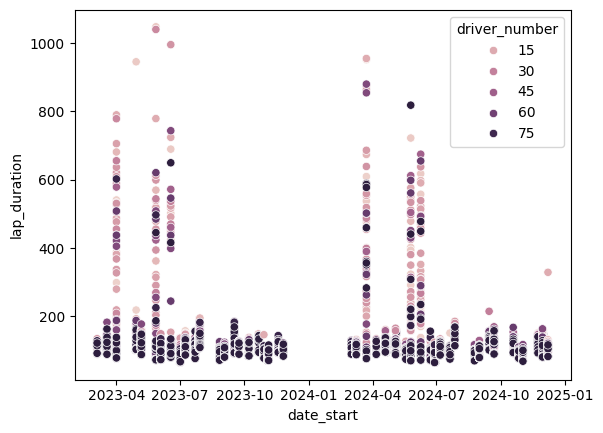

In [42]:
# plot lap times of drivers in a qualifying session
import matplotlib.pyplot as plt
import seaborn as sns
# x is date start, y is lap duration, color is driver number, for all laps

sns.scatterplot(data=quali, x='date_start', y='lap_duration', hue='driver_number')


In [43]:
best_laps = quali.groupby('session_key')['lap_duration'].min()
best_laps = best_laps.reset_index()
best_laps['max_valid_lap_duration'] = best_laps['lap_duration'] * 1.1
best_laps

,session_key,lap_duration,max_valid_lap_duration
0,7768,89.708,98.6788
1,7775,88.265,97.0915
2,7783,76.732,84.4052
3,9064,100.203,110.2233
4,9074,86.814,95.4954
5,9090,71.365,78.5015
6,9098,72.272,79.4992
7,9106,78.725,86.5975
8,9112,64.391,70.8301
9,9122,86.720,95.3920


In [44]:
# laps drop rows if lap duration is greater than 110% of the best lap duration in the session
for index, row in best_laps.iterrows():
    laps = laps[~((laps.session_key == row['session_key']) & (laps.lap_duration > row['max_valid_lap_duration']))]
 

In [45]:
laps

,lap_key,meeting_key,session_key,driver_number,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,lap_number,session_type,session_name,location
0,1,1141,7768,1,2023-03-04 15:14:33,91.295,False,29.152,39.195,22.948,3,Qualifying,Qualifying,Sakhir
3,6,1141,7768,1,2023-03-04 15:38:45,90.503,False,28.925,38.915,22.663,8,Qualifying,Qualifying,Sakhir
5,9,1141,7768,1,2023-03-04 15:59:22,89.897,False,28.722,38.645,22.530,11,Qualifying,Qualifying,Sakhir
7,12,1141,7768,1,2023-03-04 16:07:25,89.708,False,28.736,38.514,22.458,14,Qualifying,Qualifying,Sakhir
9,14,1141,7768,2,2023-03-04 15:15:47,92.673,False,29.940,39.580,23.153,2,Qualifying,Qualifying,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65856,70404,1252,9662,81,2024-12-08 14:24:12,87.731,False,17.591,38.078,32.062,52,Race,Race,Yas Island
65857,70405,1252,9662,81,2024-12-08 14:25:40,87.781,False,17.639,38.014,32.128,53,Race,Race,Yas Island
65858,70406,1252,9662,81,2024-12-08 14:27:08,87.816,False,17.603,38.000,32.213,54,Race,Race,Yas Island
65859,70407,1252,9662,81,2024-12-08 14:28:36,88.554,False,17.650,38.546,32.358,55,Race,Race,Yas Island


In [46]:
laps.session_name.unique()

array(['Qualifying', 'Race', 'Sprint', 'Sprint Shootout',
       'Sprint Qualifying'], dtype=object)

In [47]:
laps.session_name = laps.session_name.replace('Sprint Shootout', 'Sprint Qualifying')

In [48]:
last_laps_df = pd.DataFrame(columns=['session_key', 'driver_number', 'lap_duration', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3'])
# print session_type is race, all drivers last lap for each session
for race in races:
    race_laps = laps[laps.session_key == race]
    last_laps = race_laps.groupby('driver_number').tail(2).reset_index()[['session_key', 'driver_number','lap_duration', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3']]
    last_laps_df = pd.concat([last_laps_df, last_laps])
last_laps_df

/tmp/ipykernel_15673/2461765223.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  last_laps_df = pd.concat([last_laps_df, last_laps])


,session_key,driver_number,lap_duration,duration_sector_1,duration_sector_2,duration_sector_3
0,7953,1,97.205,31.091,42.270,23.844
1,7953,1,96.373,30.960,41.763,23.650
2,7953,2,98.316,31.122,43.107,24.087
3,7953,2,99.626,31.157,44.242,24.227
4,7953,4,99.789,30.938,42.162,26.689
...,...,...,...,...,...,...
33,9662,63,89.592,17.509,38.270,33.813
34,9662,77,90.691,18.311,38.886,33.494
35,9662,77,143.554,18.260,59.734,65.560
36,9662,81,88.554,17.650,38.546,32.358


In [49]:
laps.isna().sum()

lap_key              0
meeting_key          0
session_key          0
driver_number        0
date_start           0
lap_duration         0
is_pit_out_lap       0
duration_sector_1    0
duration_sector_2    0
duration_sector_3    0
lap_number           0
session_type         0
session_name         0
location             0
dtype: int64

In [50]:
laps.to_csv('laps_cleaned.csv', index=False)